# 5. Classification and Cross-Validation

**Instructions:**
* go through the notebook and complete the **tasks** .  
* Make sure you understand the examples given!
* When a question allows a free-form answer (e.g., ``what do you observe?``) create a new markdown cell below and answer the question in the notebook.
* ** Save your notebooks when you are done! **

In the previous lab, we loaded up the iris dataset for flower classification, and performed simple exploratory data analysis, i.e., we visualized the data available (features given class labels) in order to understand characteristics of the data (e.g., that some classes are easier to be separated from others based on some features, etc.)

If you don't remember much about this, please revisit the corresponding lab (Lab 2) before moving on.

In this lab, we will go through the process of actually training a classifier on a dataset (training set), and evaluating the performance of the classifier on unknown data (test set)

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Run the cell below to load our data. Notice the last line, where we add some random Gaussian noise to our data to make the task more challenging (data in real life usually contains some form of noise).

In [1]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#view a description of the dataset (uncomment next line to do so)
print(iris.DESCR)

#Set X a samples times features matrix, Y equal to the targets
X=iris.data 
y=iris.target 


#we add some random noise to our data to make the task more challenging
X=X+np.random.normal(0,0.4,X.shape)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many data samples do we have?  Print the value below using ``shape`` on X appropriately.

In [14]:
print (X.shape[0])

150


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many features do we have?  Print the value below using ``shape`` on X appropriately.

In [52]:
print (X.shape[1])

print (y)

4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many classes do we have?  Print the value below using ``np.unique`` appropriately.

3


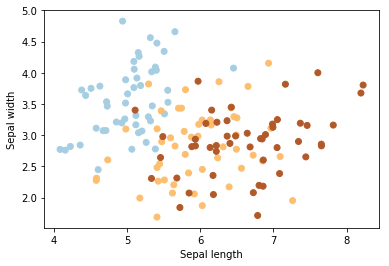

In [32]:
unqs=np.unique(y)
print(unqs.shape[0])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many samples do we have that belong to class 1?  Use the ``np.where`` function appropriately on y to print this in the cell below.

In [41]:
print(np.where(y==1)[0].size)

50


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Assume we want to generate a list of shuffled indices of our data.  Use the function ``numpy.random.permute`` to do that.  In the cell below, you can already see how to create a list of indices that is **not** shuffled.

In [50]:
L=list(range(X.shape[0]))
L=np.random.permutation(L)
print(L)

[109  55  63 106 123 132   3 146  62 138  37  40  66  28  69 127 126  51
  91 119  56  41   9 101  94  67  31 112   2  98 115 104  71  54  36   8
  11 105  48 111 125   4  68  60 120  27  30  50 142 139   0 133 122 134
 147  32  45  43 118   1  61  16 149  64  78 131  35  75  52  81   5 137
  25 107  39  84 100   7  76 121 102 141  92  53 148  70  44  83  12  77
  33  96  24  46  49 114  21  99 129  26  23  95 117  88  20 110  90  38
   6  87 108  97  80  89 128  65 140 113 136 135 116  18 103  79  14  34
  82  59  58  10  42  15 124  72  22  29  57  85  13 130  17 144 143  19
  47  93  73 145  86  74]


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Here is an example of using the k-NN classifier.  We split our data to training and testing (with a 0.2 percentage for our test data), fit on the training data, test on the testing data.  Go through the code and make sure you understand it.  Subsequently, do the same for the next cell, that prints the confusion matrix and the total accuracy.  (documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

**note: for this lab, we use the euclidean distance along with 10 neighbours**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#define knn classifier, with 5 neighbors and use the euclidian distance
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#define training and testing data, fit the classifier
knn.fit(X_train,y_train)
#predict values for test data based on training data
y_pred=knn.predict(X_test)
#print values
print(y_test) # true values
print(y_pred) # predicted values

[2 2 2 0 0 2 0 2 1 0 2 0 2 1 0 2 0 0 1 0 0 0 1 2 2 0 1 2 1 1]
[2 1 2 0 0 2 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 2 1 1]


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[12  0  0]
 [ 0  7  0]
 [ 0  7  4]]
0.766666666667


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Write your **own** functions that return the confusion matrix given the true and predicted labels, as well as the accuracy.  To do so, fill in the code in the next two cells.

In [4]:
#create a matrix with entries equal to zero, and subsequently build the confusion matrix
#the method should return the confusion matrix in a numpy array
def myConfMat(y_test,y_pred,classno):
    C=np.zeros((classno,classno)) # initialize the confusion matrix to zeros
    #loop through all results and update the confusion matrix
    for i in range (len(y_test)):
        C[y_test[i]][y_pred[i]]+=1
    return C

#note: len(np.unique(y))  indicates the dimensions of the confusion matrix (why?)
print(myConfMat(y_test,y_pred,len(np.unique(y))))

[[ 12.   0.   0.]
 [  0.   7.   0.]
 [  0.   7.   4.]]


In [5]:
#use the numpy function where to return the accuracy given the true/predicted labels.  i.e., #correct/#total
def myAccuracy(y_test,y_pred):
    mistakes=0
    for i in range (len(y_test)):
        if (y_test[i]!=y_pred[i]): mistakes+=1
    return 1-mistakes/len(y_test)
    
    
print(myAccuracy(y_test,y_pred))

0.7666666666666666


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Write your own cross-validation function.  In this case, we are using a fixed distance (euclidean) and a fixed number of neighbours (10) so we do **not** need to create a validation set.

Your function (see cell below) firstly splits the indices of each of our data into bins according to the number of folds (here: 5-fold).

Then, you should loop through all folds, split the data into training and testing by selecting the appropriate bins (see slides on cross-validation), train on training data and save the test result as the accuracy for each fold (see list accuracy_fold).  This is the list that your function should return in the end.  Remember that the ``extend`` function extends a list with more values.  

The final print call in the end of the cell should print the list of accuracies, with five values, one for each fold.

In [32]:
def myCrossVal(X,y,foldK,neighbs):
    accuracy_fold=[np.zeros((1,foldK))] #list to store accuracies folds
    
    
    #TASK: use the function np.random.permutation to generate a list of shuffled indices from in the range (0,number of data)
    #(you did this already in a task above)
    indices=np.random.permutation(np.arange(len(X)))
    #print(indices)
    
    #TASK: use the function array_split to split the indices to k different bins:
    #uncomment line below
    bins=np.split(indices,foldK)
    #print(bins)
    
    
    #loop through folds
    for foldNum in range(0,foldK):
        foldTrain=np.delete(bins[foldNum],foldNum) # list to save current indices for training
        foldTest=bins[foldNum] # list to save current indices for testing
        #TASK: take bin i for testing, rest for training.  Can use the function extend to add indices to foldTrain and foldTest
        #train kNN classifier
        features=X.shape[1]
        for currentTest in range(0,len(foldTest)):
            distances=np.zeros((len(foldTrain)))
            for currentTrain in range (0,len(foldTrain)):
                for j in range (0,features):
                    distances[currentTrain]+=np.square(X[foldTrain[currentTrain],j]-X[foldTest[currentTest],j])
            bestDists=np.argsort(distances)
        #test on test data
        #append the new accuracy to your accuracy_fold list.  You can use accuracy_score or your myAccuracy function.
    return accuracy_fold;
    
accuracy_fold=myCrossVal(X,y,5,5)
print(accuracy_fold)

[  0.92803314   4.5792689    2.76654641   0.86741919   1.63153217
   4.74147947   1.22106951   2.25760682   1.4852057    6.46418317
   1.66331154  14.13960121   3.76488153  12.43970343   0.79418253
   0.75765162   0.93937437   4.15770464   6.8987506    8.59125807
   1.28183605   1.18861742  14.67294047   2.58699812  16.11055504
   2.01004043   9.9487078   19.8789137    3.5815407 ]
[  0.           8.07474253   4.53930189   2.55032667   0.65813934
   3.85320302   1.87357709   3.56324729   0.36168496   5.08661701
   0.43819818  18.71420786   3.85225988  16.90479758   1.70862011
   1.09301523   0.66147031   2.57879399   6.88271683   7.29951745
   3.56839771   2.65236153  19.82777998   1.76792371  20.99376158
   3.72140399   9.5117423   25.49710177   3.31325252]
[  8.07474253   0.           6.6819309    1.66233153  11.04451077
  15.43704211   2.97707099   6.7804904    8.68556222  18.06749217
  11.29556858   5.50473203  14.81553094   2.91341056   3.37273458
   5.04017617   9.57958253  14.801

[  1.58168183   9.04517762   0.67111966  19.33591909   0.98750142
  46.42748598  29.45374084  17.45050015   0.93637799   8.75256152   0.
  26.34507698   0.45476579  15.42058207   1.11785197   8.60421246
   1.34369401   8.82594535   2.96944567   1.51944773  14.70829296
   2.12212601  40.49589004   9.09730731  19.96548403  11.99929032
   1.34618739   0.46672224  13.36022883]
[ 15.69404883   5.71781558  30.24361536   5.68473332  20.25941557
   3.69038131   0.76912699   1.00802839  26.88092567   7.53952432
  26.34507698   0.          31.41518515   3.19596313  23.55949623
   7.24095088  33.42485544   7.76989241  21.04182993  19.56593859
   3.89879649  24.34638415   3.5202508    4.52655151   0.93919951
   4.27298501  23.07288822  29.38543265   4.71215394]
[  3.04766953  11.62741364   1.01376544  22.83586421   2.6710801
  52.60604914  34.3750888   21.40553478   1.56381836  12.1858308
   0.45476579  31.41518515   0.          20.2470641    1.46274868
  11.82574075   1.54005826  10.66748355   4.

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Print the average accuracy and standard deviation of your results over the 5 folds. (functions ``mean`` and ``std``)

In [ ]:
#######################################